In [1]:
# https://medium.com/@maryamuzakariya/project-predict-stock-prices-using-random-forest-regression-model-in-python-fbe4edf01664

import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [9]:
def split_data_label(data):
    x = data.iloc [:, :-1].reset_index(drop=True)
    y = data.iloc[:, -1].reset_index(drop=True)
    return x, y

def train_model(train_data):
    data, label = split_data_label(train_data)
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    model = RandomForestRegressor()
    grid_rf = {
        'n_estimators': [20, 50, 100, 500, 1000],  
        'max_depth': np.arange(1, 15, 1),  
        'min_samples_split': [2, 10, 9], 
        'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
        'bootstrap': [True, False]
    }
    #rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
    #rscv_fit = rscv.fit(data, label)
    #best_parameters = rscv_fit.best_params_
    #print(best_parameters)
    # {'n_estimators': 20, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_depth': 11, 'bootstrap': True}
    #model = RandomForestRegressor(**best_parameters)
    model = RandomForestRegressor(n_estimators=20)
    model.fit(data, label)
    return model, scaler

def test_model(model, scaler, test_data):
    test_data = test_data.iloc[:-1, :]
    data, labels = split_data_label(test_data)
    data = scaler.transform(data)
    predictions = model.predict(data)
    rmse = mean_squared_error(labels, predictions, squared=False)
    print("RMSE:", rmse)
    return labels, predictions

def plot_labels_predictions(model_name, labels, predictions):
    lbl_pred = pd.DataFrame({
       'labels': labels,
       'predictions': predictions
       })
    display(lbl_pred.head())
    lbl_pred.plot.line()

In [3]:
train_data = pd.read_csv(os.path.join("..", "data", 'train.csv'), index_col=0, header=[0, 1])
test_data = pd.read_csv(os.path.join("..", "data", 'test.csv'), index_col=0, header=[0, 1])

In [10]:
model, scaler = train_model(train_data)
labels, predictions = test_model(model, scaler, test_data)

RMSE: 1864.309019010433


,labels,predictions
0,24991.052734,24868.973047
1,24988.265625,24944.341504
2,24954.080078,24954.081934
3,24929.875000,24917.042285
4,24851.216797,24930.522363


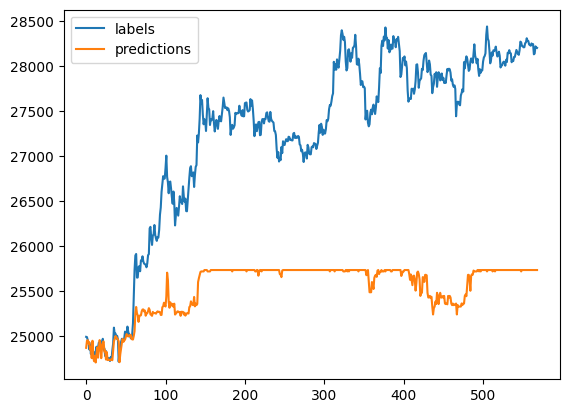

In [11]:
plot_labels_predictions('Random Forest', labels, predictions)

,labels,predictions
0,24991.052734,24868.973047
1,24988.265625,24944.341504
2,24954.080078,24954.081934
3,24929.875000,24917.042285
4,24851.216797,24930.522363


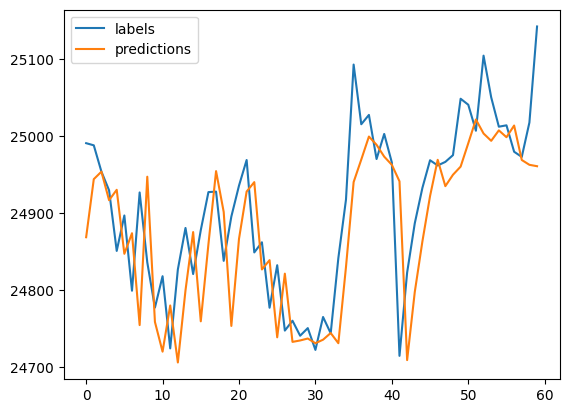

In [12]:
plot_labels_predictions('Random Forest', labels.iloc[:60], predictions[:60])